In [1]:
import cv2
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema
import numpy as np
import skimage.morphology

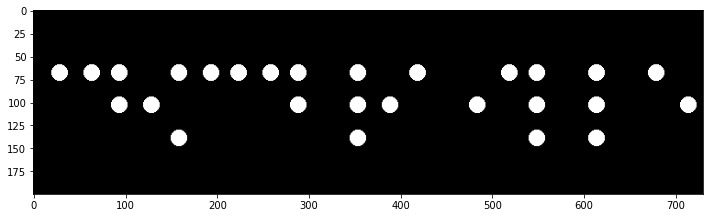

In [2]:
img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/imagens/CHMC-Braille.png", 0)
_ , img_bin = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
img_bin = (~img_bin)/255.
plt.figure(figsize=(12,12))
plt.imshow(img_bin, cmap='gray')

In [3]:
def make_histogram_x(img):
    '''
    Organiza os dados da projeção vertical na imagem
    
    Entrada:
    img -> Array da imagem
    
    Saída:
    hist -> Array com os valores do histograma de projeção vertical
    '''

    height, width = img.shape

    hist = np.zeros(width)
    for x in range(height):
        for y in range(width):
            if (img[x][y] == 1):
                hist[y] += 1
    
    return np.array(hist)

In [4]:
def make_histogram_y(img):
    '''
    Organiza os dados da projeção horizontal na imagem
    
    Entrada:
    img -> Array da imagem
    
    Saída:
    hist -> Array com os valores do histograma de projeção horizontal
    '''

    height, width = img.shape

    hist = np.zeros(height)
    for x in range(height):
        for y in range(width):
            if (img[x][y] == 1):
                hist[x] += 1
    
    return np.array(hist)

(0.0, 730.0)

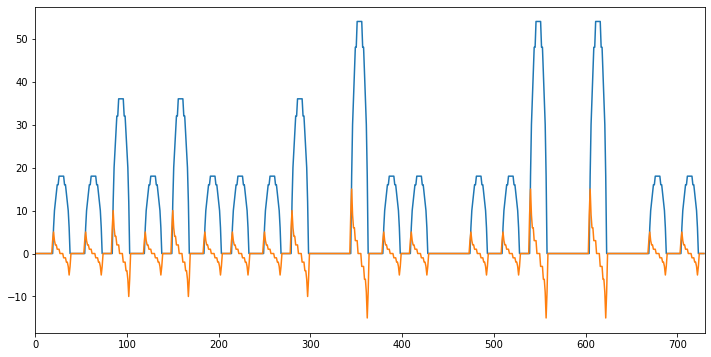

In [5]:
hist_x = make_histogram_x(img_bin)
x = np.arange(len(hist_x))
plt.figure(figsize=(12, 6))
plt.plot(x, hist_x)
plt.plot(x, np.gradient(hist_x))
plt.xlim(0, len(hist_x))

(0.0, 200.0)

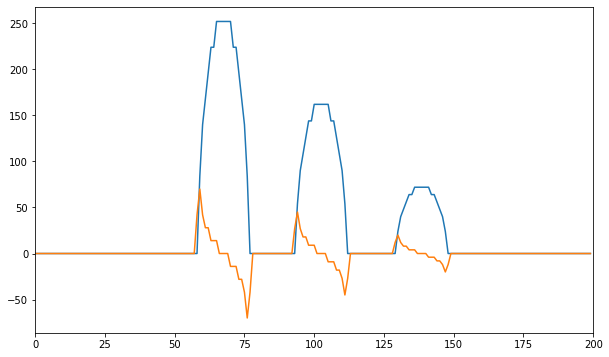

In [6]:
hist_y = make_histogram_y(img_bin)
x = np.arange(len(hist_y))
plt.figure(figsize=(10, 6))
plt.plot(x, hist_y)
plt.plot(x, np.gradient(hist_y))
plt.xlim(0, len(hist_y))

In [7]:
# Função que determina os extremos locais de uma função
def local_extremes(hist):
    # Máximos locais
    local_max = argrelextrema(hist, np.greater)[0]

    # Mínimos locais
    local_min = argrelextrema(hist, np.less)[0]
    return local_max, local_min

Determinando os máximos e mínimos locais da função gradiente do histograma vertical.

In [8]:
gradient_hist = np.gradient(hist_x)
lmax_x, lmin_x = local_extremes(gradient_hist)

print(f"Máximos locais: {lmax_x}")
print(f"Mínimos locais: {lmin_x}")
print("Diâmetro dos pontos: ", end='')
for i in range(len(lmin_x)):
    print(lmin_x[i] - lmax_x[i], end=' ')

Máximos locais: [ 20  55  85 120 150 185 215 250 280 345 380 410 475 510 540 605 670 705]
Mínimos locais: [ 37  72 102 137 167 202 232 267 297 362 397 427 492 527 557 622 687 722]
Diâmetro dos pontos: 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 

Determinando os máximos e mínimos locais da função gradiente do histograma horizontal.

In [9]:
gradient_hist = np.gradient(hist_y)
lmax_y, lmin_y = local_extremes(gradient_hist)

print(f"Máximos locais: {lmax_y}")
print(f"Mínimos locais: {lmin_y}")
print("Diâmetro dos pontos: ", end='')
for i in range(len(lmin_y)):
    print(lmin_y[i] - lmax_y[i], end=' ')

Máximos locais: [ 59  94 130]
Mínimos locais: [ 76 111 147]
Diâmetro dos pontos: 17 17 17 

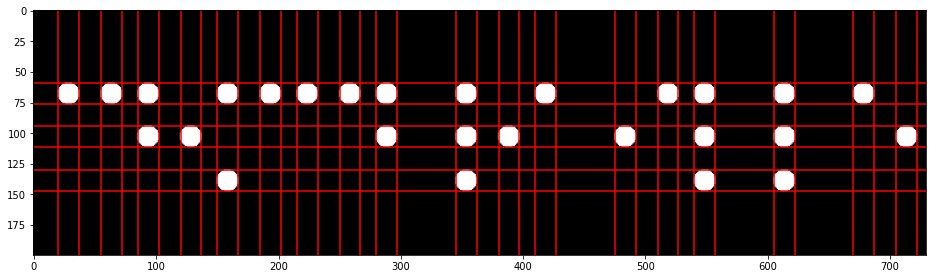

In [10]:
limiters_x = list(lmax_x) + list(lmin_x)
limiters_y = list(lmax_y) + list(lmin_y)

plt.figure(figsize=(16,14))
plt.imshow(img_bin, cmap='gray')
for lx in limiters_x:
    plt.axvline(lx, color='red')
for ly in limiters_y:
    plt.axhline(ly, color='red')

In [11]:
box_y_delimiter = [limiters_y[0],limiters_y[-1]]
print(f"Coordenadas em y da alturas das boxes: {box_y_delimiter}")

print("Distância entre os pontos da imagem: ", end='')
for i in range(len(lmin_x)-1):
    print(lmax_x[i+1] - lmin_x[i], end=' ')

Coordenadas em y da alturas das boxes: [59, 147]
Distância entre os pontos da imagem: 18 13 18 13 18 13 18 13 48 18 13 48 18 13 48 48 18 

In [12]:
for i in range(len(lmin_x)-1):
    if (lmax_x[i+1] - lmin_x[i]) == 18:
        diameter = lmin_x[i] - lmax_x[i]
        print(f"Coordenada esquerda: {lmin_x[i] - diameter}")
        print(f"Coordenada direita: {lmax_x[i+1] + diameter}")

Coordenada esquerda: 20
Coordenada direita: 72
Coordenada esquerda: 85
Coordenada direita: 137
Coordenada esquerda: 150
Coordenada direita: 202
Coordenada esquerda: 215
Coordenada direita: 267
Coordenada esquerda: 345
Coordenada direita: 397
Coordenada esquerda: 475
Coordenada direita: 527
Coordenada esquerda: 670
Coordenada direita: 722


In [13]:
box_x_delimiter = list()
for i in range(len(lmin_x)-1):
    if (lmax_x[i+1] - lmin_x[i]) == 18:
        diameter = lmin_x[i] - lmax_x[i]
        box_x_delimiter.append(lmin_x[i] - diameter)
        box_x_delimiter.append(lmax_x[i+1] + diameter)
print(f"Coordenas em x das larguras das boxes: {box_x_delimiter}")

Coordenas em x das larguras das boxes: [20, 72, 85, 137, 150, 202, 215, 267, 345, 397, 475, 527, 670, 722]


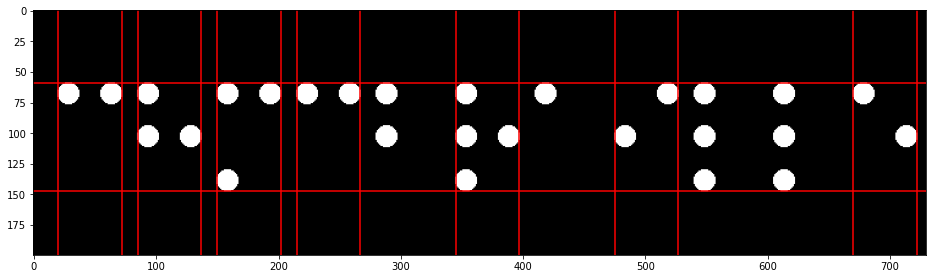

In [14]:
plt.figure(figsize=(16,14))
plt.imshow(img_bin, cmap='gray')
for lx in box_x_delimiter:
    plt.axvline(lx, color='red')
for ly in box_y_delimiter:
    plt.axhline(ly, color='red')

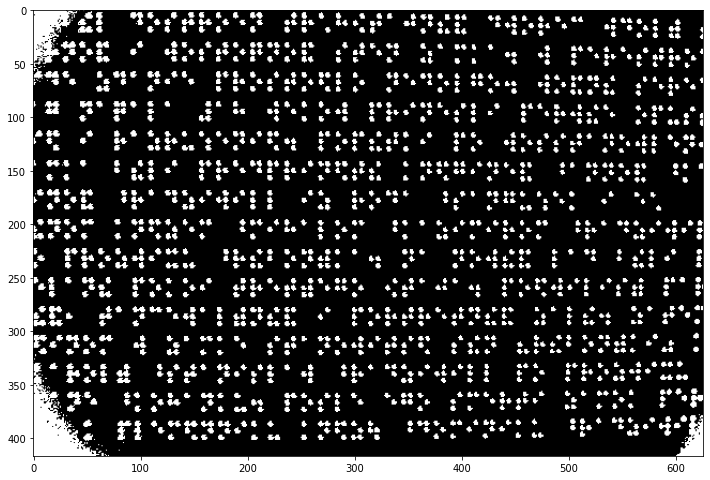

In [63]:
img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/imagens/placa-braille-com-inscricoes.jpg", 0)
_ , img_bin = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY)
img_bin = (~img_bin)/255.
plt.figure(figsize=(12,12))
plt.imshow(img_bin, cmap='gray')

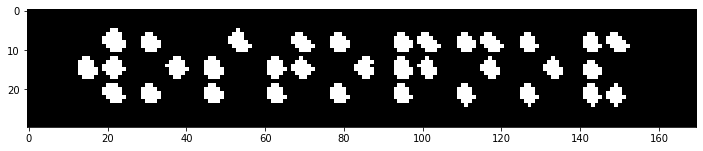

In [24]:
img_test = img_bin[25:55, 110:280]

# Realizando erosão seguida de dilatação para separar pontos conectados
kernel = skimage.morphology.disk(1)
dst_img = cv2.erode( img_test, kernel, iterations = 1 )
dst_img = cv2.dilate( dst_img, kernel, iterations = 1 )

plt.figure(figsize=(12,12))
plt.imshow(dst_img, cmap='gray')

(0.0, 170.0)

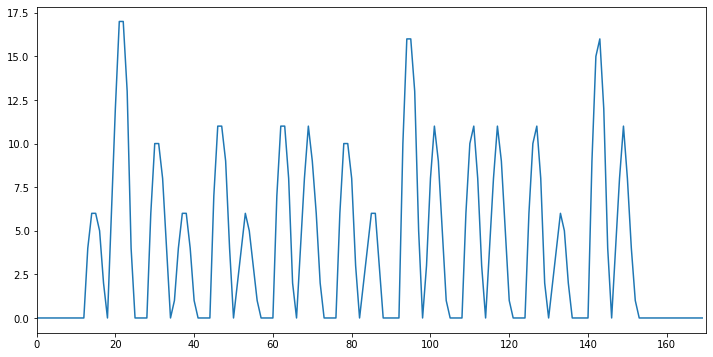

In [46]:
hist_x = make_histogram_x(dst_img)
x = np.arange(len(hist_x))
plt.figure(figsize=(12, 6))
plt.plot(x, hist_x)
# plt.plot(x, np.gradient(hist_x))
plt.xlim(0, len(hist_x))

(0.0, 30.0)

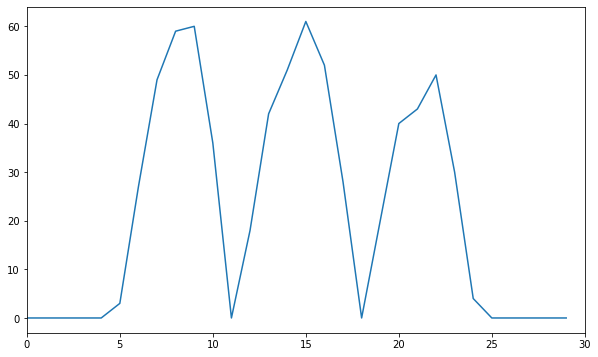

In [42]:
hist_y = make_histogram_y(dst_img)
x = np.arange(len(hist_y))
plt.figure(figsize=(10, 6))
plt.plot(x, hist_y)
# plt.plot(x, np.gradient(hist_y))
plt.xlim(0, len(hist_y))

In [64]:
def get_delimiters(hist):
    delimiters = list()
    for i in range(1, len(hist)-1):
        if (hist[i] > 0) and (hist[i-1] == 0) and (hist[i+1] > 0):
            delimiters.append(i-1)
        if (hist[i] > 0) and (hist[i-1] > 0) and (hist[i+1] == 0):
            delimiters.append(i+1)
    return delimiters

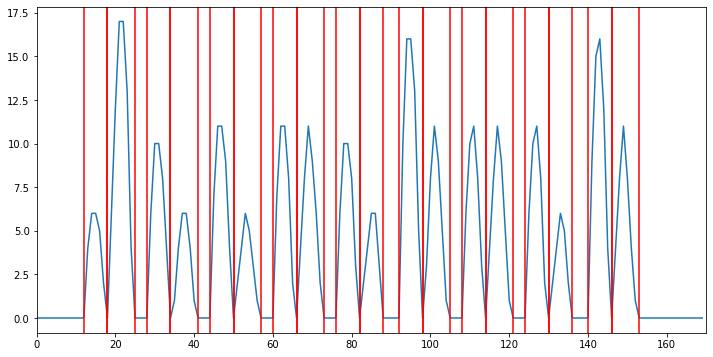

In [65]:
plt.figure(figsize=(12, 6))
plt.plot(x, hist_x)
plt.xlim(0, len(hist_x))

delimiters_x = get_delimiters(hist_x)
for lx in delimiters_x:
    plt.axvline(lx, color='red')

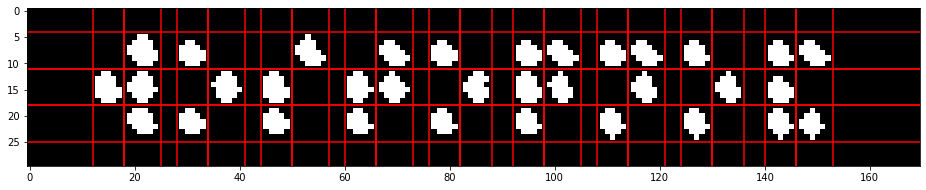

In [66]:
plt.figure(figsize=(16,14))
plt.imshow(dst_img, cmap='gray')

for lx in delimiters_x:
    plt.axvline(lx, color='red')
delimiters_y = get_delimiters(hist_y)
for ly in delimiters_y:
    plt.axhline(ly, color='red')

In [67]:
box_y_delimiters = [delimiters_y[0],delimiters_y[-1]]

print(f"Coordenadas em y da alturas das boxes: {box_y_delimiters}")

print("Distância entre os pontos da imagem: ")

for i in range(len(delimiters_x)-1):
    print(delimiters_x[i+1] - delimiters_x[i], end=' ')
    # print(f"{delimiters_x[i+1]} - {delimiters_x[i]}", end='\n')


Coordenadas em y da alturas das boxes: [4, 25]
Distância entre os pontos da imagem: 
6 0 7 3 6 0 7 3 6 0 7 3 6 0 7 3 6 0 6 4 6 0 7 3 6 0 7 3 6 0 6 4 6 0 7 

In [109]:
box_x_delimiters = list()
for i in range(len(delimiters_x)-1):
    if (delimiters_x[i+1] - delimiters_x[i]) == 0:
        diameter = delimiters_x[i] - delimiters_x[i-1]
        box_x_delimiters.append(delimiters_x[i] - diameter)
        box_x_delimiters.append(delimiters_x[i+1] + diameter)
print(f"Coordenas em x das larguras das boxes: {box_x_delimiter}")

Coordenas em x das larguras das boxes: [12, 24, 28, 40, 44, 56, 60, 72, 76, 88, 92, 104, 108, 120, 124, 136, 140, 152]


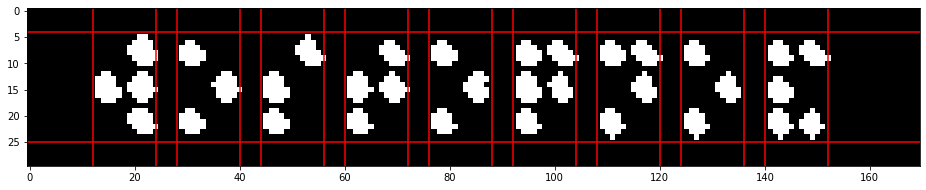

In [110]:
plt.figure(figsize=(16,14))
plt.imshow(dst_img, cmap='gray')

for lx in box_x_delimiters:
    plt.axvline(lx, color='red')
for ly in box_y_delimiters:
    plt.axhline(ly, color='red')

In [111]:
# Função que recebe uma imagem de texto braille e retorna subimagens com cada
# caractere da imagem
def get_subimages(img, x_delim, y_delim):

    subimages = list()
    for i in range(len(x_delim)//2):
        subimages.append(img[y_delim[0]:y_delim[1], x_delim[2*i]:x_delim[2*i+1]])
    return subimages
    

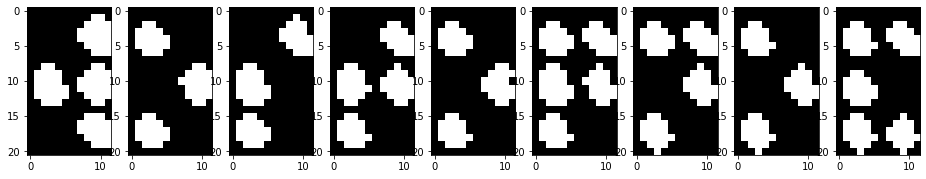

In [112]:
subimages = get_subimages(dst_img, box_x_delimiters, box_y_delimiters)
fig, axs = plt.subplots(nrows=1, ncols=len(subimages), figsize=(16,14))
for i in range(len(subimages)):
    axs[i].imshow(subimages[i], cmap='gray')